In [1]:
import numpy as np
import pandas as pd
import logging
import os
import os
import sys

log = lambda msg: logging.info(msg)

root_dir = os.path.abspath(os.path.join(os.path.dirname('__file__'), '../..'))
sys.path.append(root_dir)


# Load data

In [2]:
input_dir = "C:\\dev\\play\\brainwave-data"


In [51]:
import convert

fn = "C:\\dev\\play\\brainwave-data\\2024-11-27-21-14-24"
raw, input_file_without_ext, mne_filtered = convert.load_mne_file(log, fn + "/raw.fif")


Opening raw data file C:\dev\play\brainwave-data\2024-11-27-21-14-24/raw.fif...
Isotrak not found
    Range : 0 ... 63096 =      0.000 ...   252.384 secs
Ready.
Reading 0 ... 63096  =      0.000 ...   252.384 secs...


In [54]:
# artifacts = pd.read_csv(fn + "/raw.artifacts.csv")


# OR

from eeg_artifacts import get_artifact_sections 

all_data1 = mne_filtered.get_data(units=dict(eeg="uV"))[0]

sections, artifact_sections = get_artifact_sections(all_data1)

all_artifacts = []
for start, end in sections:
    all_artifacts.append({
        'channel': 'Fpz-M1',
        'start': int(start),
        'end': int(end)
    })
artifacts = pd.DataFrame(all_artifacts)
artifacts

In [56]:
artifact_sections

[(2766, 2832), (2961, 3127), (9084, 9134), (62874, 63096)]

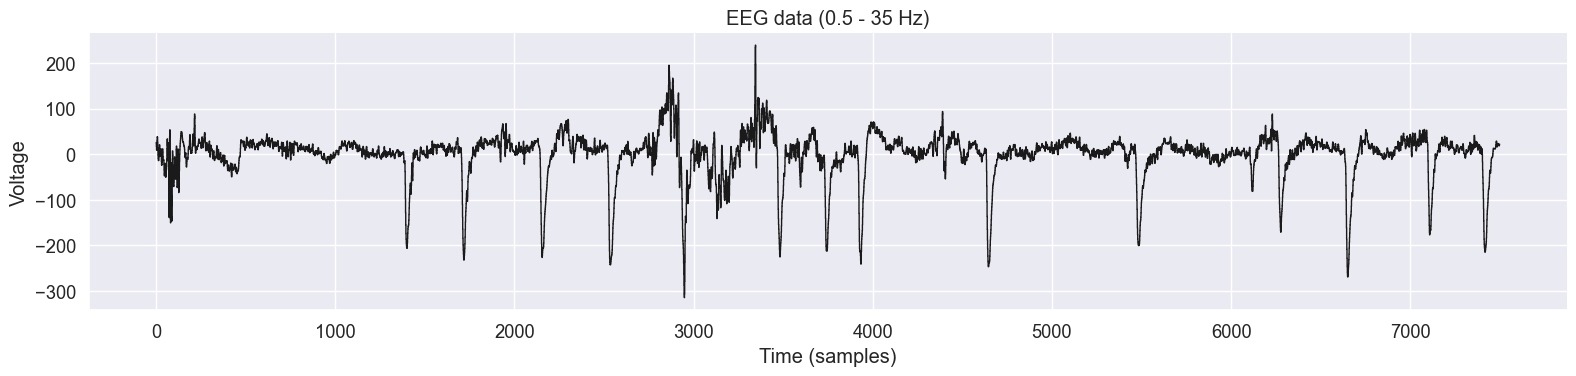

In [61]:
import notebooks.Util.DrawEpochs
from importlib import reload
reload(notebooks.Util.DrawEpochs)

epoch = notebooks.Util.DrawEpochs.get_epoch(mne_filtered, 2)
notebooks.Util.DrawEpochs.plot_eeg_data(epoch)

# Apply to YASA

In [46]:
import yasa_features
from importlib import reload
reload(yasa_features)
from yasa_features import extract_yasa_features2

yasa_feats, _ = extract_yasa_features2(log, ['Fpz-M1'], mne_filtered, artifacts, calc_both=True)
yasa_feats.head()

c:\dev\Brainwave-Processor\yasa_features.py:148: RuntimeWarning: Iterative multi-taper PSD computation did not converge.
  feat["ds"] = delta / feat["sigma"]
c:\dev\Brainwave-Processor\yasa_features.py:148: RuntimeWarning: Iterative multi-taper PSD computation did not converge.
  feat["ds"] = delta / feat["sigma"]
c:\dev\Brainwave-Processor\yasa_features.py:148: RuntimeWarning: Iterative multi-taper PSD computation did not converge.
  feat["ds"] = delta / feat["sigma"]
c:\dev\Brainwave-Processor\yasa_features.py:148: RuntimeWarning: Iterative multi-taper PSD computation did not converge.
  feat["ds"] = delta / feat["sigma"]
c:\dev\Brainwave-Processor\yasa_features.py:148: RuntimeWarning: Iterative multi-taper PSD computation did not converge.
  feat["ds"] = delta / feat["sigma"]
c:\dev\Brainwave-Processor\yasa_features.py:148: RuntimeWarning: Iterative multi-taper PSD computation did not converge.
  feat["ds"] = delta / feat["sigma"]
c:\dev\Brainwave-Processor\yasa_features.py:148: Run

,Fpz-M1_eeg_abspow,Fpz-M1_eeg_abspow_c7min_norm,Fpz-M1_eeg_abspow_p2min_norm,Fpz-M1_eeg_alpha,Fpz-M1_eeg_alpha_c7min_norm,Fpz-M1_eeg_alpha_p2min_norm,Fpz-M1_eeg_alphaaa,Fpz-M1_eeg_alphaaa_c7min_norm,Fpz-M1_eeg_alphaaa_p2min_norm,Fpz-M1_eeg_alphaab,...,Fpz-M1_Raw_eeg_thetaab_p2min_norm,Fpz-M1_Raw_eeg_thetaabs,Fpz-M1_Raw_eeg_thetaabs_c7min_norm,Fpz-M1_Raw_eeg_thetaabs_p2min_norm,Fpz-M1_Raw_eeg_thetaabsaa,Fpz-M1_Raw_eeg_thetaabsaa_c7min_norm,Fpz-M1_Raw_eeg_thetaabsaa_p2min_norm,Fpz-M1_Raw_eeg_thetaabsab,Fpz-M1_Raw_eeg_thetaabsab_c7min_norm,Fpz-M1_Raw_eeg_thetaabsab_p2min_norm
epoch,,,,,,,,,,,,,,,,,,,,,
0,0.253931,0.946961,0.029641,0.013487,-0.256907,-0.336125,0.047973,-0.086258,-0.174388,0.965513,...,0.315233,11.200132,0.011629,2.472952,18.418093,0.010281,2.696650,308.775452,0.011321,1.755129
1,1.819670,1.011646,0.745630,0.033776,-0.250660,-0.213765,0.057398,-0.065043,-0.140506,0.976378,...,-0.017708,1.724273,0.009177,1.425319,3.186646,0.008102,1.579756,11.243754,0.008573,0.908286
2,1.233625,1.045002,0.805633,0.037724,-0.232057,-0.157103,0.076889,-0.021960,-0.082499,0.960835,...,-0.036769,0.129723,0.007455,0.958582,0.229736,0.006532,1.062909,1.200721,0.006757,0.606949
3,2.285635,1.142560,1.076169,0.019622,-0.208501,-0.183359,0.049189,0.023269,-0.103287,0.970433,...,0.012745,0.337748,0.006350,0.736712,0.476791,0.005510,0.813543,3.008901,0.005482,0.458853
4,0.715446,1.193024,1.181691,0.034525,-0.185261,-0.119920,0.107283,0.064648,0.003322,0.927242,...,-0.129676,0.350074,0.005491,0.136931,0.557021,0.004715,0.158683,1.826637,0.004489,0.022030


In [50]:
yasa_feats[['Fpz-M1_eeg_removed_percentage', 'Fpz-M1_eeg_abspow', 'Fpz-M1_Raw_eeg_abspow']].head(20)
#yasa_feats[yasa_feats['Fpz-M1_eeg_removed_percentage'] > 0][['Fpz-M1_eeg_removed_percentage', 'Fpz-M1_eeg_abspow', 'Fpz-M1_Raw_eeg_abspow']].head(20)

,Fpz-M1_eeg_removed_percentage,Fpz-M1_eeg_abspow,Fpz-M1_Raw_eeg_abspow
epoch,,,
0,68.959999,0.253931,261.570404
1,36.599998,1.819670,12.057277
2,0.000000,1.233625,1.233625
3,8.720000,2.285635,2.922201
4,6.066667,0.715446,1.913040
5,0.000000,1.059543,1.059543
6,24.133333,1.328052,2.506073
7,45.240002,0.747521,6.558572
8,25.959999,2.249321,38.793324


In [41]:
yasa_feats['Fpz-M1_eeg_removed_percentage'].describe()

count    1003.000000
mean        3.998910
std        11.172257
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        92.573334
Name: Fpz-M1_eeg_removed_percentage, dtype: float64

In [48]:
artifact_rows = yasa_feats[yasa_feats['Fpz-M1_eeg_removed_percentage'] > 0]
for idx, row in artifact_rows.iterrows():
    assert row['Fpz-M1_eeg_abspow'] != row['Fpz-M1_Raw_eeg_abspow'], f"Row {idx}: Powers should differ when artifacts are removed"
print(f"Verified {len(artifact_rows)} rows with artifacts have different power values")

no_artifact_rows = yasa_feats[yasa_feats['Fpz-M1_eeg_removed_percentage'] == 0]
for idx, row in no_artifact_rows.iterrows():
    assert row['Fpz-M1_eeg_abspow'] == row['Fpz-M1_Raw_eeg_abspow'], f"Row {idx}: Powers should be the same when no artifacts are removed"
print(f"Verified {len(no_artifact_rows)} rows with no artifacts have the same power values")


Verified 209 rows with artifacts have different power values
Verified 794 rows with no artifacts have the same power values


# Applying to another file

In [ ]:
import notebooks.Util.DayAndNightOfFinder
from importlib import reload
reload(notebooks.Util.DayAndNightOfFinder)
import convert
reload(convert)

ts = '2024-09-18 06:54:44.539987087+01:00'
day_and_night1 = notebooks.Util.DayAndNightOfFinder.day_and_night_of(ts)
full_dir1, just_dir1 = notebooks.Util.DayAndNightOfFinder.day_and_night_of_dir(input_dir, day_and_night1)
raw1, input_file_without_ext1, mne_filtered1 = convert.load_mne_file(log, full_dir1 + "/raw.fif")

Opening raw data file C:\dev\play\brainwave-data\2024-09-17-21-33-14/raw.fif...
Isotrak not found
    Range : 0 ... 8687920 =      0.000 ... 34751.680 secs
Ready.
Reading 0 ... 8687920  =      0.000 ... 34751.680 secs...


[(0, 7500)]

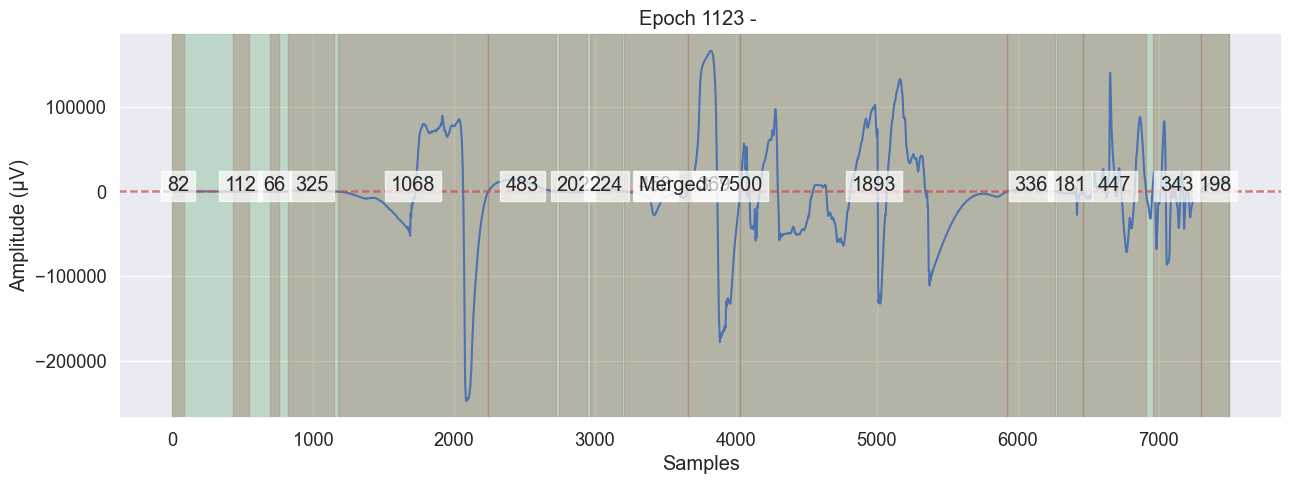

In [ ]:
plot_eeg_with_merged_artifacts(get_epoch(mne_filtered1, 1123), 1123, "", threshold=threshold, min_duration=min_duration, merge_gap=merge_gap, min_section_length=min_section_length)


In [ ]:
import yasa_features
from importlib import reload
reload(yasa_features)
from yasa_features import extract_yasa_features2
all_data1 = mne_filtered1.get_data(units=dict(eeg="uV"))[0]
merged_sections, artifact_sections = get_artifact_sections(all_data1, threshold, min_duration, merge_gap, min_section_length)
artifacts = pd.DataFrame(merged_sections, columns=['start', 'end'])
artifacts['channel'] = 'Fpz-M1'


In [ ]:
import numpy as np
import pandas as pd

def find_artifact_epochs(artifacts_df, epoch_length=7500):
    """
    Find which epochs contain artifacts.
    
    Parameters:
    -----------
    artifacts_df : pd.DataFrame
        DataFrame containing 'start' and 'end' columns with sample indices of artifacts
    epoch_length : int
        Number of samples in each epoch (default: 7500)
        
    Returns:
    --------
    artifact_epochs : set
        Set of epoch indices that contain artifacts
    """
    artifact_epochs = set()
    
    for _, artifact in artifacts_df.iterrows():
        # Get the start and end sample of the artifact
        start_sample = artifact['start']
        end_sample = artifact['end']
        
        # Calculate which epochs this artifact spans
        start_epoch = start_sample // epoch_length
        end_epoch = end_sample // epoch_length
        
        # Add all epochs that contain any part of this artifact
        for epoch_idx in range(start_epoch, end_epoch + 1):
            artifact_epochs.add(epoch_idx)
    
    return artifact_epochs

# Example usage:
# artifacts_df = pd.DataFrame({
#     'start': [5000, 20000, 50000],
#     'end': [7000, 22000, 52000]
# })
# 
artifact_epochs = find_artifact_epochs(artifacts)
artifact_epochs
# print(f"Epochs containing artifacts: {sorted(artifact_epochs)}")

{1,
 36,
 40,
 94,
 145,
 153,
 154,
 178,
 179,
 180,
 181,
 182,
 183,
 187,
 188,
 190,
 191,
 230,
 240,
 242,
 243,
 244,
 245,
 246,
 248,
 249,
 253,
 259,
 260,
 262,
 263,
 264,
 265,
 266,
 268,
 273,
 279,
 280,
 287,
 288,
 299,
 306,
 309,
 365,
 366,
 431,
 433,
 434,
 455,
 505,
 552,
 554,
 555,
 556,
 558,
 561,
 562,
 622,
 627,
 638,
 657,
 662,
 666,
 667,
 668,
 669,
 677,
 684,
 687,
 688,
 694,
 698,
 699,
 700,
 701,
 710,
 711,
 714,
 722,
 730,
 760,
 773,
 785,
 786,
 788,
 789,
 793,
 795,
 804,
 807,
 809,
 812,
 815,
 817,
 818,
 819,
 832,
 834,
 835,
 885,
 886,
 922,
 926,
 927,
 932,
 956,
 997,
 998,
 999,
 1011,
 1029,
 1037,
 1052,
 1054,
 1065,
 1070,
 1071,
 1074,
 1075,
 1076,
 1077,
 1078,
 1093,
 1104,
 1112,
 1113,
 1115,
 1117,
 1119,
 1122,
 1123,
 1124,
 1125,
 1127,
 1138,
 1144,
 1145,
 1146,
 1148,
 1149,
 1150,
 1151,
 1152,
 1153,
 1154,
 1155,
 1156,
 1157,
 1158}

In [ ]:
reload(yasa_features)
from yasa_features import extract_yasa_features2

yasa_feats1, _ = extract_yasa_features2(log, ['Fpz-M1'], mne_filtered1, artifacts, calc_both=True)

for col in yasa_feats1.columns:
    # if col.endswith('_norm'):
    #     continue
    print(col, yasa_feats1.iloc[1123][col])


c:\dev\Brainwave-Processor\yasa_features.py:148: RuntimeWarning: Iterative multi-taper PSD computation did not converge.
  # psd, freqs = psd_array_multitaper(epochs, sf, adaptive=True, normalization='full', verbose=0)
c:\dev\Brainwave-Processor\yasa_features.py:148: RuntimeWarning: Iterative multi-taper PSD computation did not converge.
  # psd, freqs = psd_array_multitaper(epochs, sf, adaptive=True, normalization='full', verbose=0)
c:\dev\Brainwave-Processor\yasa_features.py:148: RuntimeWarning: Iterative multi-taper PSD computation did not converge.
  # psd, freqs = psd_array_multitaper(epochs, sf, adaptive=True, normalization='full', verbose=0)
c:\dev\Brainwave-Processor\yasa_features.py:148: RuntimeWarning: Iterative multi-taper PSD computation did not converge.
  # psd, freqs = psd_array_multitaper(epochs, sf, adaptive=True, normalization='full', verbose=0)
c:\dev\Brainwave-Processor\yasa_features.py:148: RuntimeWarning: Iterative multi-taper PSD computation did not converge.
  #

Fpz-M1_eeg_hcomp nan
Fpz-M1_eeg_hcomp_c7min_norm 0.5167940855026245
Fpz-M1_eeg_hcomp_p2min_norm 0.6950608491897583
Fpz-M1_eeg_hmob nan
Fpz-M1_eeg_hmob_c7min_norm -0.10799318552017212
Fpz-M1_eeg_hmob_p2min_norm -0.4071701467037201
Fpz-M1_eeg_iqr nan
Fpz-M1_eeg_iqr_c7min_norm 0.817172110080719
Fpz-M1_eeg_iqr_p2min_norm 0.011452911421656609
Fpz-M1_eeg_kurt nan
Fpz-M1_eeg_kurt_c7min_norm -0.018157515674829483
Fpz-M1_eeg_kurt_p2min_norm 0.4830579161643982
Fpz-M1_eeg_nzc nan
Fpz-M1_eeg_nzc_c7min_norm -0.16906969249248505
Fpz-M1_eeg_nzc_p2min_norm -0.3068543076515198
Fpz-M1_eeg_petrosian nan
Fpz-M1_eeg_petrosian_c7min_norm -0.03695507347583771
Fpz-M1_eeg_petrosian_p2min_norm -0.08284851908683777
Fpz-M1_eeg_removed_percentage 100.0
Fpz-M1_eeg_removed_percentage_c7min_norm 2.1061770915985107
Fpz-M1_eeg_removed_percentage_p2min_norm 2.177877902984619
Fpz-M1_eeg_skew nan
Fpz-M1_eeg_skew_c7min_norm -0.18510288000106812
Fpz-M1_eeg_skew_p2min_norm -0.4192776083946228
Fpz-M1_eeg_std nan
Fpz-M1_eeg_st

c:\dev\Brainwave-Processor\yasa_features.py:148: RuntimeWarning: Iterative multi-taper PSD computation did not converge.
  # psd, freqs = psd_array_multitaper(epochs, sf, adaptive=True, normalization='full', verbose=0)
c:\dev\Brainwave-Processor\yasa_features.py:249: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/panda